Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re

In [2]:
doramas = pd.read_csv('doramas.csv')
doramas

,web-scraper-order,web-scraper-start-url,link,link-href,duration,series,year,country,genre,rating,num of rate
0,1649986511-3607,https://doramy.club/page/200,В 30 всё только начинается,https://doramy.club/20973-v-30-vsyo-tolko-nach...,2 часа,NaN,2011,Таиланд,"Драма, Комедия, Мелодрама",8.37,111
1,1649964937-1447,https://doramy.club/page/417,Полный дом (тайская версия),https://doramy.club/948-polnyj-dom-tajskaya-ve...,50 мин,20 серий,2014,Таиланд,"Комедия, Мелодрама",8.54,1389
2,1649987675-3726,https://doramy.club/page/188,Ветеринар,https://doramy.club/21654-veterinar.html,1 час,50 серий,2012,Южная Корея,"Драма, Исторический, Мелодрама",7.21,119
3,1649990723-4133,https://doramy.club/page/148,Большой школьный взрыв,https://doramy.club/18725-bolshoj-shkolnyj-vzr...,38 мин.,15 серий,2020,Китай,"Комедия, Мелодрама",8.37,405
4,1649982353-3177,https://doramy.club/page/243,Вернуть мир тебе,https://doramy.club/15424-vernut-mir-tebe.html,45 мин.,58 серий,2019,Китай,"Драма, Мелодрама",7.41,303
...,...,...,...,...,...,...,...,...,...,...,...
4293,1649981095-3085,https://doramy.club/page/253,Твой аромат,https://doramy.club/15184-tvoj-aromat.html,45 мин.,25 серий,2019,Китай,"Комедия, Мелодрама, Фантастика",8.78,1953
4294,1649967982-1927,https://doramy.club/page/369,Высшее общество,https://doramy.club/6665-vysshee-obshhestvo.html,1 час,16 серий,2015,Южная Корея,"Драма, Комедия, Мелодрама",8.47,1718
4295,1649965329-1525,https://doramy.club/page/409,Еще есть время для любви,https://doramy.club/2974-eshhe-est-vremya-dlya...,40 мин.,9 серий,2015,Гонконг,"Драма, Мелодрама, Мистика",8.79,1400
4296,1649973655-2365,https://doramy.club/page/325,Суперзвезда Ю Пэк,https://doramy.club/9218-superzvezda-yu-pek.html,1 час 11 мин.,11 серий,2018,Южная Корея,"Комедия, Мелодрама",8.85,967


In [3]:
doramas.dtypes

web-scraper-order         object
web-scraper-start-url     object
link                      object
link-href                 object
duration                  object
series                    object
year                       int64
country                   object
genre                     object
rating                   float64
num of rate                int64
dtype: object

Уберём ненужные для работы столбцы .

In [4]:
del doramas['web-scraper-order']
del doramas['web-scraper-start-url']

doramas

,link,link-href,duration,series,year,country,genre,rating,num of rate
0,В 30 всё только начинается,https://doramy.club/20973-v-30-vsyo-tolko-nach...,2 часа,NaN,2011,Таиланд,"Драма, Комедия, Мелодрама",8.37,111
1,Полный дом (тайская версия),https://doramy.club/948-polnyj-dom-tajskaya-ve...,50 мин,20 серий,2014,Таиланд,"Комедия, Мелодрама",8.54,1389
2,Ветеринар,https://doramy.club/21654-veterinar.html,1 час,50 серий,2012,Южная Корея,"Драма, Исторический, Мелодрама",7.21,119
3,Большой школьный взрыв,https://doramy.club/18725-bolshoj-shkolnyj-vzr...,38 мин.,15 серий,2020,Китай,"Комедия, Мелодрама",8.37,405
4,Вернуть мир тебе,https://doramy.club/15424-vernut-mir-tebe.html,45 мин.,58 серий,2019,Китай,"Драма, Мелодрама",7.41,303
...,...,...,...,...,...,...,...,...,...
4293,Твой аромат,https://doramy.club/15184-tvoj-aromat.html,45 мин.,25 серий,2019,Китай,"Комедия, Мелодрама, Фантастика",8.78,1953
4294,Высшее общество,https://doramy.club/6665-vysshee-obshhestvo.html,1 час,16 серий,2015,Южная Корея,"Драма, Комедия, Мелодрама",8.47,1718
4295,Еще есть время для любви,https://doramy.club/2974-eshhe-est-vremya-dlya...,40 мин.,9 серий,2015,Гонконг,"Драма, Мелодрама, Мистика",8.79,1400
4296,Суперзвезда Ю Пэк,https://doramy.club/9218-superzvezda-yu-pek.html,1 час 11 мин.,11 серий,2018,Южная Корея,"Комедия, Мелодрама",8.85,967


Уберём из списка сериалы, рейтинг которых ниже 7.0.

In [7]:
new = doramas[doramas['rating'] >= 7.0]

new

,link,link-href,duration,series,year,country,genre,rating,num of rate
0,В 30 всё только начинается,https://doramy.club/20973-v-30-vsyo-tolko-nach...,2 часа,NaN,2011,Таиланд,"Драма, Комедия, Мелодрама",8.37,111
1,Полный дом (тайская версия),https://doramy.club/948-polnyj-dom-tajskaya-ve...,50 мин,20 серий,2014,Таиланд,"Комедия, Мелодрама",8.54,1389
2,Ветеринар,https://doramy.club/21654-veterinar.html,1 час,50 серий,2012,Южная Корея,"Драма, Исторический, Мелодрама",7.21,119
3,Большой школьный взрыв,https://doramy.club/18725-bolshoj-shkolnyj-vzr...,38 мин.,15 серий,2020,Китай,"Комедия, Мелодрама",8.37,405
4,Вернуть мир тебе,https://doramy.club/15424-vernut-mir-tebe.html,45 мин.,58 серий,2019,Китай,"Драма, Мелодрама",7.41,303
...,...,...,...,...,...,...,...,...,...
4293,Твой аромат,https://doramy.club/15184-tvoj-aromat.html,45 мин.,25 серий,2019,Китай,"Комедия, Мелодрама, Фантастика",8.78,1953
4294,Высшее общество,https://doramy.club/6665-vysshee-obshhestvo.html,1 час,16 серий,2015,Южная Корея,"Драма, Комедия, Мелодрама",8.47,1718
4295,Еще есть время для любви,https://doramy.club/2974-eshhe-est-vremya-dlya...,40 мин.,9 серий,2015,Гонконг,"Драма, Мелодрама, Мистика",8.79,1400
4296,Суперзвезда Ю Пэк,https://doramy.club/9218-superzvezda-yu-pek.html,1 час 11 мин.,11 серий,2018,Южная Корея,"Комедия, Мелодрама",8.85,967


In [5]:
doramas['year'].value_counts()

2021    665
2020    610
2019    514
2017    469
2018    448
2016    312
2015    252
2014    192
2022    153
2013    142
2012    119
2011     90
2010     76
2009     53
2008     45
2006     40
2007     39
2005     29
2004     17
2003     13
2002      6
2001      5
2000      4
1991      2
1992      1
1997      1
1987      1
Name: year, dtype: int64

Рассмотрим зависимость количества сериалов от года их выпуска.

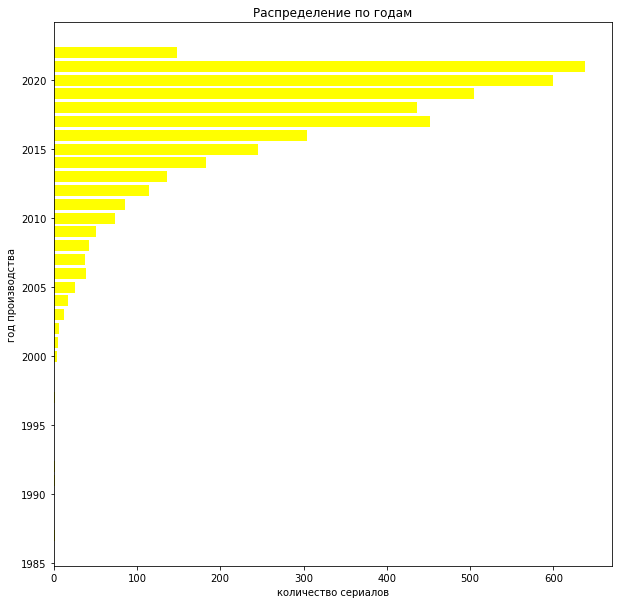

In [54]:
plt.figure(figsize = (10, 10))
plt.barh(y = list(new['year'].value_counts().index.values), width = list(new['year'].value_counts()), color = 'yellow')
plt.ylabel('год производства')
plt.xlabel('количество сериалов')
plt.title('Распределение по годам')
plt.show()

In [32]:
doramas['country'].value_counts()

Южная Корея                1771
Китай                      1172
Япония                      571
Таиланд                     549
Тайвань                     117
Филиппины                    41
Гонконг                      14
Гонконг, Китай               12
Вьетнам                      12
Китай, Тайвань               10
Китай, Южная Корея           10
Гонконг, Китай, Тайвань       2
США                           2
Южная Корея, Япония           2
Гонконг, Япония               1
Китай, Япония                 1
Таиланд, Япония               1
Китай, США                    1
США, Южная Корея              1
Name: country, dtype: int64

Определим, в каких странах снималось больше всего сериалов.

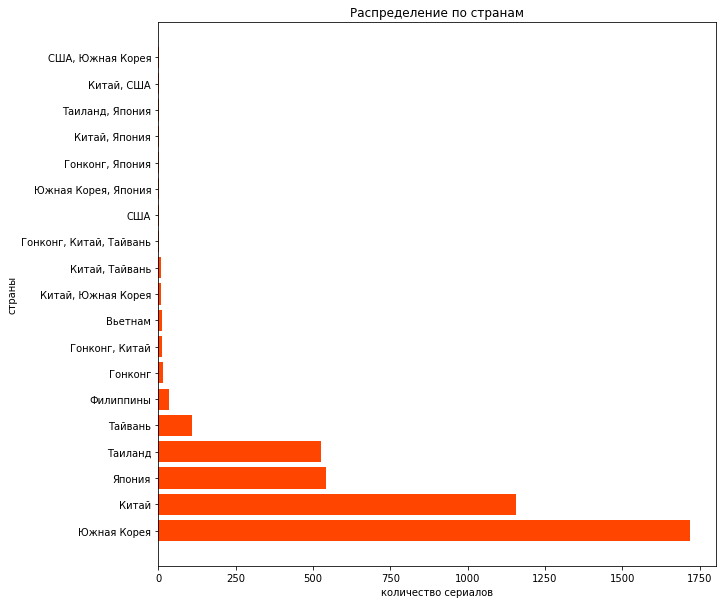

In [39]:
plt.figure(figsize = (10, 10))
plt.barh(y = list(new['country'].value_counts().index.values), width = list(new['country'].value_counts()), color = 'orangered')
plt.ylabel('страны')
plt.xlabel('количество сериалов')
plt.title('Распределение по странам')
plt.show()

In [6]:
doramas['rating'].value_counts()

9.05    47
9.07    43
9.10    43
9.06    41
9.03    39
        ..
6.81     1
9.72     1
5.53     1
9.70     1
6.80     1
Name: rating, Length: 351, dtype: int64

In [27]:
doramas['series'].value_counts()

16 серий     496
10 серий     273
12 серий     265
24 серии     252
20 серий     201
            ... 
121 серия      1
124 серии      1
66 серий       1
34 серий       1
126 серий      1
Name: series, Length: 140, dtype: int64

In [87]:
new['genre'].value_counts()

Драма, Мелодрама                        549
Комедия, Мелодрама                      540
Мелодрама                               470
Драма                                   195
Драма, Комедия, Мелодрама               182
                                       ... 
Криминал, Мелодрама, Триллер              1
Исторический, Комедия, Фэнтези            1
Комедия, Мелодрама, Мистика, Триллер      1
Боевые искусства, Фэнтези                 1
Исторический, Фантастика                  1
Name: genre, Length: 482, dtype: int64

Посмотрим, есть ли закономерности между годом выпуска, рейтингом и количеством оценок.

<AxesSubplot:>

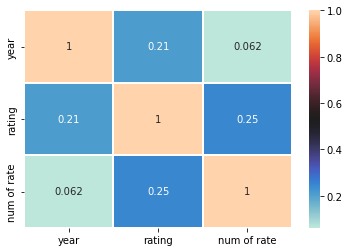

In [32]:
sns.heatmap(new.corr(), annot = True, cmap='icefire',linewidths=1.9)

In [ ]:
Была выявлена закономерность между рейтингом и числом посмотревших. Рассмотрим её поближе.

C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


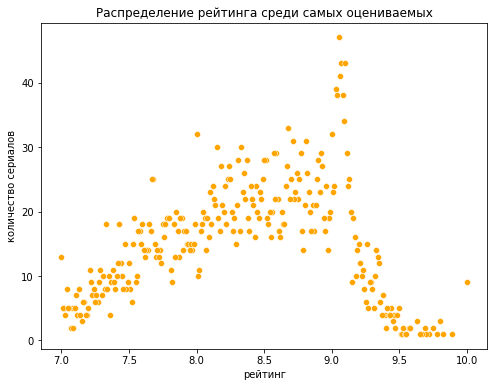

In [45]:
d = new['rating'].value_counts()
y = d.index.values
plt.figure(figsize=(8,6))
sns.scatterplot(y, d, color = 'orange')
plt.title('Распределение рейтинга среди самых оцениваемых')
plt.xlabel('рейтинг')
plt.ylabel('количество сериалов')
plt.show()

Напишем программу, предлагающую случайный сериал выбранного жанра.

In [27]:
def dorama(genre):
    list1 = []
    for i in new['genre']:
        new['genre'] = new['genre'].fillna('Неизвестно')
        for k in new['genre']:
            if genre in k:
                list1.append(k)
    df1 = new.loc[new['genre'] == random.choice(list1)] 
    return df1.sample()
            

In [53]:
dorama('Боевик')

C:\Users\elena\AppData\Local\Temp/ipykernel_31012/3129675152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['genre'] = new['genre'].fillna('Неизвестно')


,link,link-href,duration,series,year,country,genre,rating,num of rate
2428,Охотники за головами,https://doramy.club/25547-oxotniki-za-golovami...,1 час 20 мин,17 серий,2020,Таиланд,Боевик,7.26,27
